**Os livros mais vendidos da amazon entre 2009 e 2019**



*  Conjunto de dados sobre os 50 livros mais vendidos da Amazon de 2009 a 2019.

* Contém 550 livros, os dados foram categorizados em ficção e não ficção 


link dataset: https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019






importndo algumas das principais biblioteca como pandas e matplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Atribuir a uma variável o dataset escolhido

In [2]:
dfbooks = pd.read_csv('/content/drive/MyDrive/bestsellers.csv')

Com o método head() é possível ver as promeiras linha dos dataframe, por padrão ele exibe as primeiras 5 linhas

In [3]:
dfbooks.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Podemos usar o describe() e info() para retornar um resumo estatístico das variáveis númericas e obter um resumo de valores não-nulos encontrados respectivamente.

In [4]:
dfbooks.describe()
dfbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


##Analise de correlação

* Correlação exprime o grau de relação entre duas variáveis

* Os dados podem ser representados por pares ordenados (x,y), onde $x$ é a variável independente ou explanatória e $y$ é a variável dependente ou resposta

In [5]:
preco = dfbooks.Price
classf = dfbooks['User Rating']

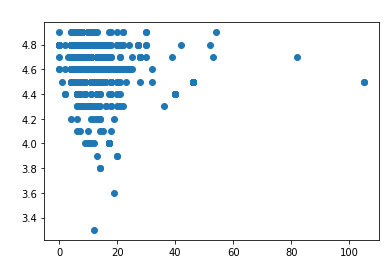

In [6]:
#Correlçao Preco x Cassificação
plt.scatter(preco, classf)
plt.xlabel('PREÇO', color='white' )
plt.ylabel('Classificação(user)', color='white' )
plt.title('Diagrama de Dispersão', color='white' )
plt.show()

Maior classificação menor preço

preço nao interfere na classificação

In [7]:
reviwes = dfbooks.Reviews
classf = dfbooks['User Rating']

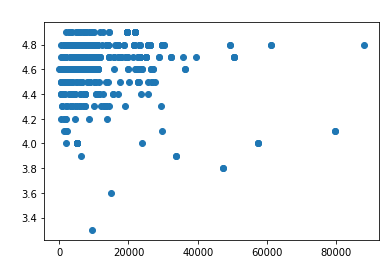

In [8]:
#Correlçao Preco x Cassificação
plt.scatter(reviwes, classf)
plt.xlabel('Comentários', color='white' )
plt.ylabel('Classificação(user)', color='white' )
plt.title('Diagrama de Dispersão', color='white' )
plt.show()

Correlação alta entre classificação e  o numero de comentarios

##coeficiente de Correlação

* O coeficiente de correlação é uma medida de forma e direção de uma relação linear entre duas variáveis

 * A amplitude do coeficiente de correlação é $-1$ para 1
  * Se $x$ e $y$ têm uma correlação linear positiva forte, $\rho$ está próximo de 1
  * Se $x$ e $y$ têm uma correlação linear negativa forte, $\rho$ está próximo de $-1$
  * Se a correlação linear entre $x$ e $y$ é fraca ou inexistente, $\rho$ está próximo de 0

In [9]:
import numpy as np

np.corrcoef(preco, classf)


array([[ 1.        , -0.13308629],
       [-0.13308629,  1.        ]])

In [10]:
import numpy as np

np.corrcoef(preco, reviwes)

array([[ 1.        , -0.10918188],
       [-0.10918188,  1.        ]])

Para tentar identificar de forma mais clara podemos utilizar o coeficiẽnte de correlação, chegando a conclusão que ambas comparações tem uma baixa correlação entre elas.

##Regressão Linear

* Após verificar se a correlação linear entre duas variáveis é significante, o próximo passo é determinar a equação da linha que melhor modela os dados

In [11]:
from scipy import stats

preco = dfbooks.Price
classf = dfbooks['User Rating']

m, b, r_value, p_value, std_err = stats.linregress(preco, classf)
m, b

(-0.0027861320937439442, 4.654861966791683)

In [12]:
#Calculando a linha de Regressão

linha_reg = [m*i+b for i in range(int(max(preco))+1)]

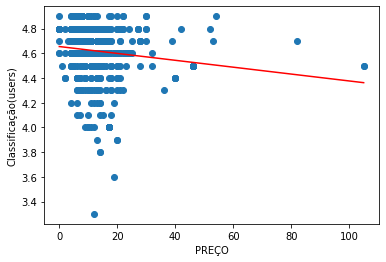

In [13]:
#Diagrama de disperssão entre preço e  classificação
plt.scatter(preco, classf)
plt.plot(linha_reg, 'r')
plt.xlabel('PREÇO')
plt.ylabel('Classificação(users)')
plt.show()

In [14]:
dfbooks['Author'].value_counts()

Jeff Kinney                           12
Rick Riordan                          11
Gary Chapman                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
The Staff of The Late Show with
       1
Mark Owen                              1
Hopscotch Girls                        1
Patrick Thorpe                         1
Alice Schertle                         1
Name: Author, Length: 248, dtype: int64

In [15]:
dfauthors = pd.DataFrame(dfbooks['Author'].unique(),columns=['Name'])
dfauthors

,Name
0,JJ Smith
1,Stephen King
2,Jordan B. Peterson
3,George Orwell
4,National Geographic Kids
...,...
243,Cheryl Strayed
244,Ken Follett
245,Geneen Roth
246,R. J. Palacio


In [16]:
#Número de livros por autores
cont = dfbooks['Author'].value_counts()
dfauthors['NbBooks'] = dfauthors['Name'].apply(lambda x: cont[x])
dfauthors.sort_values('NbBooks',ascending=False)

,Name,NbBooks
33,Jeff Kinney,12
159,Gary Chapman,11
136,Rick Riordan,11
37,Suzanne Collins,11
139,American Psychological Association,10
...,...,...
114,Keith Richards,1
115,Chris Cleave,1
116,Alice Schertle,1
117,Celeste Ng,1


In [17]:
# Média dos preços e das avaliações
meanPrice = dfbooks.groupby('Author').mean()['Price']
dfauthors['MeanPrice'] = dfauthors['Name'].apply(lambda x: meanPrice[x])

meanRatings = dfbooks.groupby('Author').mean()['User Rating']
dfauthors['MeanUserRating'] = dfauthors['Name'].apply(lambda x: meanRatings[x])

dfauthors

,Name,NbBooks,MeanPrice,MeanUserRating
0,JJ Smith,1,8.00,4.700
1,Stephen King,4,16.75,4.525
2,Jordan B. Peterson,1,15.00,4.700
3,George Orwell,1,6.00,4.700
4,National Geographic Kids,1,12.00,4.800
...,...,...,...,...
243,Cheryl Strayed,1,18.00,4.400
244,Ken Follett,1,15.00,4.500
245,Geneen Roth,1,11.00,4.200
246,R. J. Palacio,5,9.00,4.800


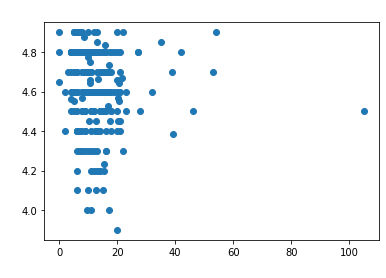

In [18]:
#Correlçao Preco x Cassificação
plt.scatter(meanPrice, meanRatings)
plt.xlabel('Comentários', color='white' )
plt.ylabel('Classificação(user)', color='white' )
plt.title('Diagrama de Dispersão', color='white' )
plt.show()

In [19]:
dfauthors['RatingPriceFactor'] = dfauthors['MeanUserRating']/dfauthors['MeanPrice']
dfauthors=dfauthors[dfauthors['RatingPriceFactor']<np.inf]
dfauthors.sort_values('RatingPriceFactor',ascending=False)

,Name,NbBooks,MeanPrice,MeanUserRating,RatingPriceFactor
9,Larry Schweikart,1,2.000000,4.600000,2.300000
61,Bob Woodward,1,2.000000,4.400000,2.200000
7,James Comey,1,3.000000,4.700000,1.566667
97,Ann Whitford Paul,2,4.000000,4.800000,1.200000
87,Mitch Albom,1,4.000000,4.800000,1.200000
...,...,...,...,...,...
203,The College Board,6,39.333333,4.383333,0.111441
139,American Psychological Association,10,46.000000,4.500000,0.097826
83,Lin-Manuel Miranda,1,54.000000,4.900000,0.090741
168,Bill Simmons,1,53.000000,4.700000,0.088679


In [24]:
dfauthors['MultiBooks'] = dfauthors['NbBooks'].apply(lambda x: x>1)
dfauthors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,NbBooks,MeanPrice,MeanUserRating,RatingPriceFactor,MultiBooks
0,JJ Smith,1,8.00,4.700,0.587500,False
1,Stephen King,4,16.75,4.525,0.270149,True
2,Jordan B. Peterson,1,15.00,4.700,0.313333,False
3,George Orwell,1,6.00,4.700,0.783333,False
4,National Geographic Kids,1,12.00,4.800,0.400000,False
...,...,...,...,...,...,...
243,Cheryl Strayed,1,18.00,4.400,0.244444,False
244,Ken Follett,1,15.00,4.500,0.300000,False
245,Geneen Roth,1,11.00,4.200,0.381818,False
246,R. J. Palacio,5,9.00,4.800,0.533333,True


In [25]:
#Autores melhores avaliados avaliados com apenas 1 livro
dfauthors[dfauthors['MultiBooks']==False].sort_values('RatingPriceFactor',ascending=False)['Name'][:10]

9                 Larry Schweikart
61                    Bob Woodward
7                      James Comey
140                   Golden Books
87                     Mitch Albom
231                     Silly Bear
34                    Sasha O'Hara
13     Adult Coloring Book Designs
198                    Chip Gaines
53                     Marty Noble
Name: Name, dtype: object

In [26]:
#Autores melhores avaliados avaliados com mais de 1 livro
dfauthors[dfauthors['MultiBooks']].sort_values('RatingPriceFactor',ascending=False)['Name'][:10]

71         Giles Andreae
97     Ann Whitford Paul
219          Craig Smith
64          Roger Priddy
108          Rob Elliott
41       Marjorie Sarnat
73            Harper Lee
32       Bill Martin Jr.
216           Eric Carle
120        Robert Munsch
Name: Name, dtype: object

In [27]:
#Autores com livros mais caros e com pior classificação
dfauthors.sort_values('RatingPriceFactor')['Name'][:10]

49       American Psychiatric Association
168                          Bill Simmons
83                     Lin-Manuel Miranda
139    American Psychological Association
203                     The College Board
232                            Alan Moore
162                          Paulo Coelho
85                          J. K. Rowling
10                          Jaycee Dugard
36                         Thomas Piketty
Name: Name, dtype: object

In [33]:
#separando nódulos malignos e benignos para fazer a comparação
ficcao = dfbooks[dfbooks.Genre == 'Fiction'].reset_index(drop=True)
noficcao = dfbooks[dfbooks.Genre == 'Non Fiction'].reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


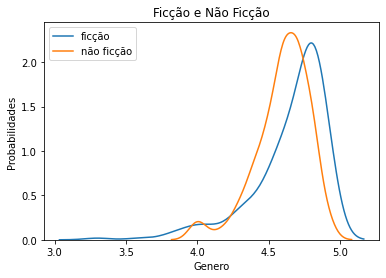

In [41]:
# distribuição de probabilidade comparando o Classificação media dos usuários para as duas classes
sns.distplot(ficcao['User Rating'], hist=False, rug=False,label='ficção')
sns.distplot(noficcao['User Rating'], hist=False, rug=False,label='não ficção')
plt.xlabel('Genero')
plt.ylabel('Probabilidades')
plt.title('Ficção e Não Ficção')
plt.legend()
plt.show()

In [42]:

#calculando estatísticas das amostras
medFiccao = ficcao['User Rating'].mean()
desvFiccao = ficcao['User Rating'].std()

medNoFiccao = noficcao['User Rating'].mean()
desvNoFiccao = noficcao['User Rating'].std()

print(medFiccao, desvFiccao)
print(medNoFiccao,desvNoFiccao)

4.648333333333326 0.2651227972638524
4.595161290322579 0.18955527867802857


Média e desvio diferentes porém próximos entre os atributos